# Week 3 Exercise

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

# Newton's method Continue

1) Does this method guarantee solution for any function and any guess?

No because: 
1. f(x) is zero
2. when we start too far beacasue the number keeps getting larger and larger, we can't reach to the solution.


2) What are pros and cons of Newtons' Method vs bisection?

Newton's Method:
pros: It is fast and it can down to the real result faster. 
cons:   - when we start too far beacasue the number keeps getting larger and larger, we can't reach to the solution.
        - not accurate
    
    
bisection
pros: guarantee solution
cons: slow

    sometimes hybrid is accptable. Frist use the bisection, and when the bounds are close enough use newton's method.

3) What exactly does quadratic convergence mean?

## Numerical Derivative

1) Let $f(x) = x^3$ analytically calculate $f'(0.5)$.

In [3]:
# 3 x^2
print (3 * (0.5)**2)

0.75


2) Use forward finite difference to approximate $f'(0.5)$ with $h=0.1$

In [4]:
def f(x):
    return x**3
h = 0.1 #given small-enough h
print (f(0.5+h)-f(0.5))/h

0.09099999999999997


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

3) Use forward finite difference to approximate $f'(0.5)$ with $h=0.001$

In [12]:
def f(x):
    return x**3
h = 0.001
print (f(0.5+h)-f(0.5))/h

0.0007515009999999878


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

3.5 Plot fp(x) for h=0.1 and h=0.001

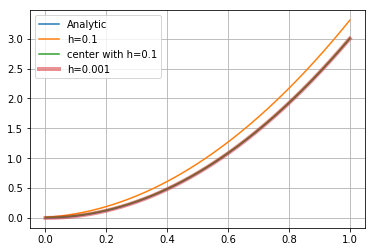

In [13]:
xs = np.linspace(0,1,200)
def f(x):
    return x**3
def analytic(x):
    return 3*x**2

def numerical(x,h):
    return (f(x+h) - f(x))/h
def center(x, h):
    return (f(x+h) - f(x-h))/(2*h)

analytic_ys = [analytic(x) for x in xs]
big_ys = [numerical(x, 0.1) for x in xs]
small_ys = [numerical(x, 0.001) for x in xs]
centered_ys = [center(x,0.1) for x in xs]
plt.plot(xs, analytic_ys, label="Analytic")
plt.plot(xs, big_ys, label="h=0.1")
plt.plot(xs, centered_ys, label='center with h=0.1')
plt.plot(xs, small_ys, label="h=0.001", lw=4, alpha=0.5)
plt.grid()
plt.legend()




4) Use centered finite difference to approximate $f'(0.5)$ with $h=0.1$

In [14]:
h = 0.1
print (f(0.5+h)-f(0.5-h))/(2*h)

0.15199999999999997


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

5) Use centered finite difference to approximate $f'(0.5)$ with $h=0.001$

In [15]:
h = 0.001
print (f(0.5+h)-f(0.5-h))/(2*h)

0.0015000019999999864


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

6) Which one is a better approach? How do we quantify it?

7) Derive a formula which will give you an even more accurate result.

6) Let $f(x) = \sin(x)$ analytically know that $f'(x)=\cos(x)$. Plot $\cos(x)$ along with the derivative of $\sin(x)$ obtained from finite difference. Pick a reasonable value for $h$ and plotting range.

7) Find $f''(0.5)$ for $f(x) = x^5$ using centered finite difference for $h=0.05$

8) Given that formula what is the convergence rate?

9) What can go wrong if $h$ is really really small?

# Newton's method with numerical derivative

1) Write a function
```def newton(f, start, n):```
that try to find solution of $f(x)=0$ given starting point at $x = start$ for n iteration. But this time you don't need to do $f'(x)$ by hands.

Try it on our usual suspect: solving $x = \cos(x)$



In [32]:
def f(x):
    return math.cos(x) - x
def fp(x, h):
    return (f(x+h) - f(x-h)) / (2*h)

    
def newton(f, start, n):
    for i in range(n):
        start = start - (f(start)/fp(start,0.001))
    return start

newton(f, 10, 100)

0.7390851332151607

# Edge Detection (probably gonna be part of your homework)

1) Read in Mario.png
```
im = plt.imread(filename)
plt.imshow(im)
```

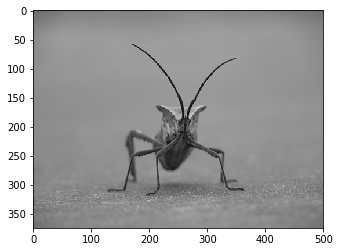

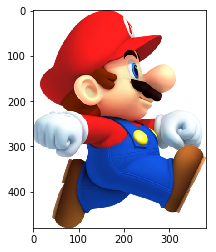

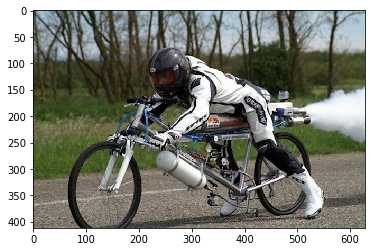

In [17]:
stinkbug = plt.imread('stinkbug.png')
mario = plt.imread('mario.png')
rocket = plt.imread('rocket-bicycle.png')
plt.imshow(stinkbug)
plt.figure()
plt.imshow(mario)
plt.figure()
plt.imshow(rocket)

2) The dimension of each output is the following: Can you guess what each dimension means?

or read this http://matplotlib.org/api/image_api.html

In [36]:
print (stinkbug.shape)
print (mario.shape)
print (rocket.shape)

(375, 500, 3)
(480, 381, 4)
(412, 628, 3)


3) Try to get a pixel on mario hat. It should be really close to red [1,0,0,1]. Note that the first dimesion is actually y not x.
```
    mario[y,x]
```

In [37]:
print (mario[50,170])
#print (mario[50,170])

[ 1.          0.12941177  0.12156863  1.        ]


3.1) You can make a big blob in the image too
```
    mario [10:20,30:40] = np.array([0,1,0,1]) #green
```
this changes the image array where the first index is 10 to 20 and second index from 30 to 40 all to green. This is called chunk assignment. Quite convenient.

Try imshow after you edit. If you need to reset mario, do 
```
mario = plt.imread('mario.png')
```


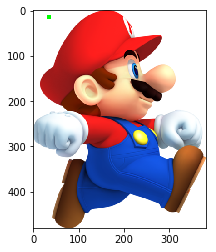

In [38]:
mario [10:20,30:40] = np.array([0,1,0,1])
plt.imshow(mario)

4) What defines an edge? What quantity distinguish the pixel in the middle of the hat and the pixel separating the hat and his ear?

5) Write a function that given location $y,x$ and then calculate how "likely" it is that pixel x,y is an edge pixel.

In [39]:
def diff(origin, neigh):
    return np.sum((origin-neigh)**2) # it will sum every elements in list

def edgy(pic, y, x):
    center = pic[y,x]
    top = pic[y-1, x]
    left = pic[y, x-1]
    right = pic[y+1, x]
    bottom = pic[y+1, x]
    
    score = diff(center, top)
    score += diff(center, left)
    score += diff(center, right)
    score += diff(center, bottom)
    
    return score

6) Make an empty 3d array of (ydimension, xdimension, ncolor). Then start putting in each pixel with the size of gradient.

In [40]:
em = np.zeros(mario.shape)
print(em.shape)


(480, 381, 4)


In [42]:
ny = em.shape[0]
nx = em.shape[1]
for iy in range(1, ny-1):
    for ix in  range(1, nx-1):
        score = edgy(mario, iy,ix)
        em[iy, ix] = np.array([score]*4)

7)Show the result.

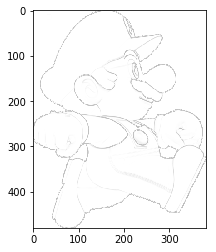

In [43]:
plt.imshow(em)

8) Wrap all these in a function and try it on other images